In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [249]:
df = pd.read_csv("blinkit_structured_cleaned_new.csv")
df.head()

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Product.Blinkit,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned
0,𝙂𝙖𝙪𝙧𝙖𝙫 𝙆𝙪𝙢𝙖𝙧,Blinkit complaint,@shivaye07kumar,2025-05-13T09:37:03.000Z,Ordered @gonoise product from @blinkitcares a...,https://x.com/shivaye07kumar/status/1922224563...,Yes,8.0,11.0,18,...,@gonoise,Delhi,NaN,Negative,High,"['Refund', 'Replacement']",NaN,"['Scammed', 'Denied refund', 'Denied replaceme...",['Noise Canceling Headphones'],"['Refund', 'Replacement']"
1,Abhay Dubey,Blinkit complaint,@_abhaydy,2025-05-30T12:54:48.000Z,@blinkitcares @BandBajaateRaho @jagograhakjago...,https://x.com/_abhaydy/status/1928434922760376400,Yes,2.0,2.0,NaN,...,NaN,NaN,NaN,Negative,High,"['Re-open complaint', 'Provide proof']",NaN,"['Complaint not resolved', 'Lack of evidence',...",NaN,"['Reopen complaint', 'Provide proof']"
2,Sanjeev Singh,Blinkit complaint,@SanjeevSin45545,2025-06-08T03:02:44.000Z,@letsblinkit\nI ordered a digital watch from B...,https://x.com/SanjeevSin45545/status/193154741...,Yes,1.0,NaN,NaN,...,['Digital watch'],NaN,NaN,Negative,High,['Look into the issue urgently'],NaN,"['wrong product received', 'denied support']",['watch'],['look into the issue urgently']
3,P.D,Blinkit complaint,@dhrpd91,2025-05-19T16:49:52.000Z,Ordered a watermelon from @letsblinkit — cut i...,https://x.com/dhrpd91/status/1924507813335990635,No,0.0,0.0,0,...,['watermelon'],NaN,NaN,Negative,High,"['Help with the complaint', 'Refund or replace...",NaN,"['spoiled product', 'product not as expected']",['fruit'],"['help with complaint', 'refund or replacement']"
4,Regina Phalange,Blinkit complaint,@SurbhiPatidar19,2025-06-04T14:32:45.000Z,Wow. Blinkit just suspended my ID because I da...,https://x.com/SurbhiPatidar19/status/193027151...,Yes,NaN,2.0,NaN,...,NaN,NaN,NaN,Negative,High,['un-suspend ID'],NaN,"['Suspended ID', 'Customer Complaint']",NaN,['Un-suspend ID']


In [250]:
df.columns

Index(['Name', 'Query', 'User Profile', 'Date Posted', 'Post Text',
       'Post Link', 'Media', 'Comments', 'Reposts', 'Likes', 'Views',
       'Cleaned Post', 'llm_raw', 'llm_parsed', 'Issue', 'Product', 'Location',
       'Order_ID', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Product.Blinkit', 'Issue_cleaned', 'Product_cleaned',
       'Resolution_Requested_cleaned'],
      dtype='object')

In [251]:
df['Sentiment'].unique()

array(['Negative', nan, 'Neutral', 'Positive', "['Negative']"],
      dtype=object)

In [252]:
df[df['Sentiment']=="['Negative']"]

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Product.Blinkit,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned
727,Aby Alex,Blinkit Complaint,https://www.linkedin.com/in/aby-alex-988184186...,2025-06-09,⚠️ Disappointed with Blinkit: Where's My Refun...,https://www.linkedin.com/feed/update/urn:li:ac...,No,3.0,0.0,5,...,['Blinkit'],NaN,['ORD147328729'],['Negative'],['High'],"['Proper refund without coupon', 'Improve cust...",NaN,"['Disappointed with refund process', 'Order no...",['Grocery'],"['Refund without coupon', 'Improve customer su..."


In [253]:
df['Urgency'].unique()

array(['High', nan, 'Medium', 'Low', "['High']"], dtype=object)

In [254]:
df[df['Urgency']=="['High']"]

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Product.Blinkit,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned
727,Aby Alex,Blinkit Complaint,https://www.linkedin.com/in/aby-alex-988184186...,2025-06-09,⚠️ Disappointed with Blinkit: Where's My Refun...,https://www.linkedin.com/feed/update/urn:li:ac...,No,3.0,0.0,5,...,['Blinkit'],NaN,['ORD147328729'],['Negative'],['High'],"['Proper refund without coupon', 'Improve cust...",NaN,"['Disappointed with refund process', 'Order no...",['Grocery'],"['Refund without coupon', 'Improve customer su..."
1581,Ritika S.,Blinkit issue,https://www.linkedin.com/in/ritika-s-0a2a68172...,2025-06-02,Being a tester is amazing! I wanted to share a...,https://www.linkedin.com/feed/update/urn:li:ac...,Yes,0.0,0.0,22,...,['Nongshim Shin Cup Noodles'],NaN,NaN,Positive,['High'],"['Fix the mislabeling issue', 'Consider it a h...",NaN,"['Mislabeling dietary classification', 'Confus...",['Instant Noodles'],"['Fix mislabeling issue', 'Treat as high prior..."


In [255]:
df['Urgency'] = np.where(df['Urgency']=="['High']", "High", df['Urgency'])
df['Sentiment'] = np.where(df['Sentiment']=="['Negative']", "Negative", df['Sentiment'])

In [256]:
df[df['Sentiment']=="['Negative']"]

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Product.Blinkit,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned


In [257]:
df[df['Urgency']=="['High']"]

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Product.Blinkit,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned


In [258]:
df.isnull().sum()

Name                               1
Query                              0
User Profile                       0
Date Posted                        3
Post Text                          0
Post Link                          0
Media                              0
Comments                         214
Reposts                          539
Likes                            534
Views                            904
Cleaned Post                       0
llm_raw                            0
llm_parsed                         0
Issue                            827
Product                         1126
Location                        1389
Order_ID                        1399
Sentiment                        410
Urgency                          497
Resolution_Requested             430
Product.Blinkit                 1613
Issue_cleaned                     36
Product_cleaned                 1035
Resolution_Requested_cleaned      66
dtype: int64

In [259]:
df.drop(['Product.Blinkit'], axis=1, inplace=True)

In [260]:
df.isnull().sum()

Name                               1
Query                              0
User Profile                       0
Date Posted                        3
Post Text                          0
Post Link                          0
Media                              0
Comments                         214
Reposts                          539
Likes                            534
Views                            904
Cleaned Post                       0
llm_raw                            0
llm_parsed                         0
Issue                            827
Product                         1126
Location                        1389
Order_ID                        1399
Sentiment                        410
Urgency                          497
Resolution_Requested             430
Issue_cleaned                     36
Product_cleaned                 1035
Resolution_Requested_cleaned      66
dtype: int64

In [261]:
df.columns

Index(['Name', 'Query', 'User Profile', 'Date Posted', 'Post Text',
       'Post Link', 'Media', 'Comments', 'Reposts', 'Likes', 'Views',
       'Cleaned Post', 'llm_raw', 'llm_parsed', 'Issue', 'Product', 'Location',
       'Order_ID', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned'],
      dtype='object')

In [262]:
df[['Issue', 'Product', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned']].head()

,Issue,Product,Sentiment,Urgency,Resolution_Requested,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned
0,"['Scammed', 'Denied refund', 'Denied replaceme...",@gonoise,Negative,High,"['Refund', 'Replacement']","['Scammed', 'Denied refund', 'Denied replaceme...",['Noise Canceling Headphones'],"['Refund', 'Replacement']"
1,"['Complaint not resolved', 'Lack of evidence',...",NaN,Negative,High,"['Re-open complaint', 'Provide proof']","['Complaint not resolved', 'Lack of evidence',...",NaN,"['Reopen complaint', 'Provide proof']"
2,"['Wrong product received', 'Denied support']",['Digital watch'],Negative,High,['Look into the issue urgently'],"['wrong product received', 'denied support']",['watch'],['look into the issue urgently']
3,"['Spoiled product', 'Product not as expected']",['watermelon'],Negative,High,"['Help with the complaint', 'Refund or replace...","['spoiled product', 'product not as expected']",['fruit'],"['help with complaint', 'refund or replacement']"
4,"['suspended ID', 'customer complaint']",NaN,Negative,High,['un-suspend ID'],"['Suspended ID', 'Customer Complaint']",NaN,['Un-suspend ID']


In [264]:
df.isnull().sum()

Name                               1
Query                              0
User Profile                       0
Date Posted                        3
Post Text                          0
Post Link                          0
Media                              0
Comments                         214
Reposts                          539
Likes                            534
Views                            904
Cleaned Post                       0
llm_raw                            0
llm_parsed                         0
Issue                            827
Product                         1126
Location                        1389
Order_ID                        1399
Sentiment                        410
Urgency                          497
Resolution_Requested             430
Issue_cleaned                     36
Product_cleaned                 1035
Resolution_Requested_cleaned      66
dtype: int64

In [265]:
import numpy as np
import pandas as pd

cols_to_clean = [
    'Issue', 'Product', 'Sentiment', 'Urgency', 'Resolution_Requested',
    'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned'
]

def is_useless(cell):
    if pd.isna(cell):
        return True

    if isinstance(cell, str):
        try:
            parsed = eval(cell)
            if isinstance(parsed, list):
                cell = parsed
            else:
                cell = [cell]
        except:
            cell = [cell]

    if isinstance(cell, list):
        cleaned = [str(x).strip().lower() for x in cell if x is not None]
        cleaned = [x for x in cleaned if x not in ['', 'none', 'nan', 'null']]
        return len(cleaned) == 0

    return False

for col in cols_to_clean:
    df[col] = df[col].apply(lambda x: np.nan if is_useless(x) else x)


In [266]:
df.isnull().sum()

Name                               1
Query                              0
User Profile                       0
Date Posted                        3
Post Text                          0
Post Link                          0
Media                              0
Comments                         214
Reposts                          539
Likes                            534
Views                            904
Cleaned Post                       0
llm_raw                            0
llm_parsed                         0
Issue                            827
Product                         1127
Location                        1389
Order_ID                        1399
Sentiment                        410
Urgency                          497
Resolution_Requested             640
Issue_cleaned                    810
Product_cleaned                 1126
Resolution_Requested_cleaned     652
dtype: int64

In [267]:
df["primary_key"] = df.index

In [268]:
len(df)

1613

In [269]:
import pandas as pd
import numpy as np

engagement_cols = ['Comments', 'Reposts', 'Likes', 'Views']

def clean_engagement(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip().lower().replace(",", "")
    try:
        if 'k' in val:
            return int(float(val.replace('k', '')) * 1000)
        elif val.replace('.', '', 1).isdigit():
            return int(float(val))
        else:
            print(col,val)
            return -1
    except:
        return -1

for col in engagement_cols:
    df[col] = df[col].apply(clean_engagement)

df = df[~df[engagement_cols].isin([-1]).any(axis=1)]


Likes 1 comment
Likes 1 comment
Likes 3 comments
Likes 1 repost
Likes 2 comments
Likes 1 comment
Likes 1 comment
Likes 1 comment
Likes 1 repost
Likes 2 reposts
Likes 2 comments
Likes 1 repost


In [270]:
len(df)

1601

In [271]:
df.head()

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned,primary_key
0,𝙂𝙖𝙪𝙧𝙖𝙫 𝙆𝙪𝙢𝙖𝙧,Blinkit complaint,@shivaye07kumar,2025-05-13T09:37:03.000Z,Ordered @gonoise product from @blinkitcares a...,https://x.com/shivaye07kumar/status/1922224563...,Yes,8.0,11.0,18.0,...,@gonoise,Delhi,NaN,Negative,High,"['Refund', 'Replacement']","['Scammed', 'Denied refund', 'Denied replaceme...",['Noise Canceling Headphones'],"['Refund', 'Replacement']",0
1,Abhay Dubey,Blinkit complaint,@_abhaydy,2025-05-30T12:54:48.000Z,@blinkitcares @BandBajaateRaho @jagograhakjago...,https://x.com/_abhaydy/status/1928434922760376400,Yes,2.0,2.0,NaN,...,NaN,NaN,NaN,Negative,High,"['Re-open complaint', 'Provide proof']","['Complaint not resolved', 'Lack of evidence',...",NaN,"['Reopen complaint', 'Provide proof']",1
2,Sanjeev Singh,Blinkit complaint,@SanjeevSin45545,2025-06-08T03:02:44.000Z,@letsblinkit\nI ordered a digital watch from B...,https://x.com/SanjeevSin45545/status/193154741...,Yes,1.0,NaN,NaN,...,['Digital watch'],NaN,NaN,Negative,High,['Look into the issue urgently'],"['wrong product received', 'denied support']",['watch'],['look into the issue urgently'],2
3,P.D,Blinkit complaint,@dhrpd91,2025-05-19T16:49:52.000Z,Ordered a watermelon from @letsblinkit — cut i...,https://x.com/dhrpd91/status/1924507813335990635,No,0.0,0.0,0.0,...,['watermelon'],NaN,NaN,Negative,High,"['Help with the complaint', 'Refund or replace...","['spoiled product', 'product not as expected']",['fruit'],"['help with complaint', 'refund or replacement']",3
4,Regina Phalange,Blinkit complaint,@SurbhiPatidar19,2025-06-04T14:32:45.000Z,Wow. Blinkit just suspended my ID because I da...,https://x.com/SurbhiPatidar19/status/193027151...,Yes,NaN,2.0,NaN,...,NaN,NaN,NaN,Negative,High,['un-suspend ID'],"['Suspended ID', 'Customer Complaint']",NaN,['Un-suspend ID'],4


In [302]:
# df.to_csv("final_cleaned_dataset.csv", index=False)

In [304]:
data = pd.read_csv("final_cleaned_dataset.csv")
data.head()

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned,primary_key
0,𝙂𝙖𝙪𝙧𝙖𝙫 𝙆𝙪𝙢𝙖𝙧,Blinkit complaint,@shivaye07kumar,2025-05-13T09:37:03.000Z,Ordered @gonoise product from @blinkitcares a...,https://x.com/shivaye07kumar/status/1922224563...,Yes,8.0,11.0,18.0,...,@gonoise,Delhi,NaN,Negative,High,"['Refund', 'Replacement']","['Scammed', 'Denied refund', 'Denied replaceme...",['Noise Canceling Headphones'],"['Refund', 'Replacement']",0
1,Abhay Dubey,Blinkit complaint,@_abhaydy,2025-05-30T12:54:48.000Z,@blinkitcares @BandBajaateRaho @jagograhakjago...,https://x.com/_abhaydy/status/1928434922760376400,Yes,2.0,2.0,NaN,...,NaN,NaN,NaN,Negative,High,"['Re-open complaint', 'Provide proof']","['Complaint not resolved', 'Lack of evidence',...",NaN,"['Reopen complaint', 'Provide proof']",1
2,Sanjeev Singh,Blinkit complaint,@SanjeevSin45545,2025-06-08T03:02:44.000Z,@letsblinkit\nI ordered a digital watch from B...,https://x.com/SanjeevSin45545/status/193154741...,Yes,1.0,NaN,NaN,...,['Digital watch'],NaN,NaN,Negative,High,['Look into the issue urgently'],"['wrong product received', 'denied support']",['watch'],['look into the issue urgently'],2
3,P.D,Blinkit complaint,@dhrpd91,2025-05-19T16:49:52.000Z,Ordered a watermelon from @letsblinkit — cut i...,https://x.com/dhrpd91/status/1924507813335990635,No,0.0,0.0,0.0,...,['watermelon'],NaN,NaN,Negative,High,"['Help with the complaint', 'Refund or replace...","['spoiled product', 'product not as expected']",['fruit'],"['help with complaint', 'refund or replacement']",3
4,Regina Phalange,Blinkit complaint,@SurbhiPatidar19,2025-06-04T14:32:45.000Z,Wow. Blinkit just suspended my ID because I da...,https://x.com/SurbhiPatidar19/status/193027151...,Yes,NaN,2.0,NaN,...,NaN,NaN,NaN,Negative,High,['un-suspend ID'],"['Suspended ID', 'Customer Complaint']",NaN,['Un-suspend ID'],4


In [305]:
len(data)

1601

In [306]:
data["primary_key"] = data.index
data.head()

,Name,Query,User Profile,Date Posted,Post Text,Post Link,Media,Comments,Reposts,Likes,...,Product,Location,Order_ID,Sentiment,Urgency,Resolution_Requested,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned,primary_key
0,𝙂𝙖𝙪𝙧𝙖𝙫 𝙆𝙪𝙢𝙖𝙧,Blinkit complaint,@shivaye07kumar,2025-05-13T09:37:03.000Z,Ordered @gonoise product from @blinkitcares a...,https://x.com/shivaye07kumar/status/1922224563...,Yes,8.0,11.0,18.0,...,@gonoise,Delhi,NaN,Negative,High,"['Refund', 'Replacement']","['Scammed', 'Denied refund', 'Denied replaceme...",['Noise Canceling Headphones'],"['Refund', 'Replacement']",0
1,Abhay Dubey,Blinkit complaint,@_abhaydy,2025-05-30T12:54:48.000Z,@blinkitcares @BandBajaateRaho @jagograhakjago...,https://x.com/_abhaydy/status/1928434922760376400,Yes,2.0,2.0,NaN,...,NaN,NaN,NaN,Negative,High,"['Re-open complaint', 'Provide proof']","['Complaint not resolved', 'Lack of evidence',...",NaN,"['Reopen complaint', 'Provide proof']",1
2,Sanjeev Singh,Blinkit complaint,@SanjeevSin45545,2025-06-08T03:02:44.000Z,@letsblinkit\nI ordered a digital watch from B...,https://x.com/SanjeevSin45545/status/193154741...,Yes,1.0,NaN,NaN,...,['Digital watch'],NaN,NaN,Negative,High,['Look into the issue urgently'],"['wrong product received', 'denied support']",['watch'],['look into the issue urgently'],2
3,P.D,Blinkit complaint,@dhrpd91,2025-05-19T16:49:52.000Z,Ordered a watermelon from @letsblinkit — cut i...,https://x.com/dhrpd91/status/1924507813335990635,No,0.0,0.0,0.0,...,['watermelon'],NaN,NaN,Negative,High,"['Help with the complaint', 'Refund or replace...","['spoiled product', 'product not as expected']",['fruit'],"['help with complaint', 'refund or replacement']",3
4,Regina Phalange,Blinkit complaint,@SurbhiPatidar19,2025-06-04T14:32:45.000Z,Wow. Blinkit just suspended my ID because I da...,https://x.com/SurbhiPatidar19/status/193027151...,Yes,NaN,2.0,NaN,...,NaN,NaN,NaN,Negative,High,['un-suspend ID'],"['Suspended ID', 'Customer Complaint']",NaN,['Un-suspend ID'],4


In [307]:
data.nunique()

Name                            1397
Query                             46
User Profile                    1414
Date Posted                      720
Post Text                       1582
Post Link                       1601
Media                              2
Comments                          68
Reposts                           22
Likes                            147
Views                            153
Cleaned Post                    1582
llm_raw                         1166
llm_parsed                      1111
Issue                            756
Product                          356
Location                         147
Order_ID                         180
Sentiment                          3
Urgency                            3
Resolution_Requested             899
Issue_cleaned                    759
Product_cleaned                  312
Resolution_Requested_cleaned     892
primary_key                     1601
dtype: int64

In [308]:
data.columns

Index(['Name', 'Query', 'User Profile', 'Date Posted', 'Post Text',
       'Post Link', 'Media', 'Comments', 'Reposts', 'Likes', 'Views',
       'Cleaned Post', 'llm_raw', 'llm_parsed', 'Issue', 'Product', 'Location',
       'Order_ID', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned',
       'primary_key'],
      dtype='object')

In [309]:
df = data[['primary_key', 'Cleaned Post', 'Issue', 'Product', 'Location', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned']]
df.sample(10)

,primary_key,Cleaned Post,Issue,Product,Location,Sentiment,Urgency,Resolution_Requested,Issue_cleaned,Product_cleaned,Resolution_Requested_cleaned
1265,1265,Celebrating Raja Festival with Blinkit! As Odi...,NaN,NaN,Odisha,Positive,Low,NaN,NaN,NaN,NaN
758,758,JioMarts Struggles in Quick CommerceDespite it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,486,"Today, I ordered a product for office purposes...","['different product received', 'disappointing ...",NaN,NaN,Negative,High,['correct order'],"['different product received', 'disappointing ...",NaN,['correct order']
43,43,Ordered from @letsblinkit today and got this r...,"['Rotten product', 'Poor customer service', 'N...",['Brinjal'],NaN,Negative,High,"['Raise a complaint', 'Support', 'Call', 'Refu...","['Rotten product', 'Poor customer service']",['Vegetable'],"['Raise a complaint', 'Get Support', 'Call', '..."
1457,1457,Dear Deepinder Goyal and team Blinkit are you ...,"['Rotten milk packets', 'Poor customer service...",['Milk packets'],NaN,Negative,High,"['Connect to a supervisor', 'Assist with the i...","['Rotten milk', 'Poor customer service', 'Atti...",['Dairy products'],"['Connect to a supervisor', 'Assist with the i..."
852,852,Dear MuscleBlaze HealthKart its time to rethin...,"['Poor quality of free shaker bottles', 'Leaki...",MuscleBlaze products,NaN,Negative,High,"['Pass on a 2030 discount to customers', 'Impr...","['Poor quality of free shaker bottles', 'Leaki...",['Supplements'],"['Pass on a discount to customers', 'Improve p..."
1010,1010,Hey Blinkit what should a customer do when the...,"['Tampered product', 'Refusal to take responsi...",NaN,NaN,Negative,High,"['Take responsibility for wrong item', 'Provid...","['Tampered product', 'Refusal to take responsi...",NaN,"['Take responsibility for wrong item', 'Provid..."
1019,1019,UX Insight of the Day: Blinkit promises grocer...,NaN,NaN,NaN,Negative,High,"['Fix the flow', 'Retain more users', 'Grow fa...",NaN,NaN,"['fix_the_flow', 'retain_more_users', 'grow_fa..."
1196,1196,Blinkit Zomato Twice Fooled by Blinkit No Cust...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,1070,HIRING ALERT JOIN BLINKITS HIGH-PERFORMANCE OP...,NaN,NaN,Gurgaon,Neutral,Low,NaN,NaN,NaN,NaN


In [310]:
df.dropna(subset=['Sentiment'], inplace=True)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\2882551401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Sentiment'], inplace=True)


In [311]:
df.isnull().sum()

primary_key                        0
Cleaned Post                       0
Issue                            415
Product                          717
Location                        1016
Sentiment                          0
Urgency                           88
Resolution_Requested             277
Issue_cleaned                    404
Product_cleaned                  722
Resolution_Requested_cleaned     291
dtype: int64

In [312]:
df['Product_cleaned'].value_counts()

Product_cleaned
['Grocery']            24
['Generic Product']    13
['Food']               11
['Protein']            11
['product']            10
                       ..
Supplement              1
['icecream']            1
Protein                 1
['pack']                1
['Body Wash']           1
Name: count, Length: 309, dtype: int64

In [313]:
df.columns

Index(['primary_key', 'Cleaned Post', 'Issue', 'Product', 'Location',
       'Sentiment', 'Urgency', 'Resolution_Requested', 'Issue_cleaned',
       'Product_cleaned', 'Resolution_Requested_cleaned'],
      dtype='object')

In [314]:
import pandas as pd
import ast

for col in ['Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])


C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\1598980715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])


In [315]:
df_issue = df[['primary_key', 'Issue_cleaned']].explode('Issue_cleaned').reset_index(drop=True)
df_product = df[['primary_key', 'Product_cleaned']].explode('Product_cleaned').reset_index(drop=True)
df_resolution = df[['primary_key', 'Resolution_Requested_cleaned']].explode('Resolution_Requested_cleaned').reset_index(drop=True)

df_issue['Issue_explod'] = df_issue['Issue_cleaned'].apply(lambda x: str(x).strip().title() if pd.notna(x) else x)
df_product['Product_explod'] = df_product['Product_cleaned'].apply(lambda x: str(x).strip().title() if pd.notna(x) else x)
df_resolution['Resolution_Requested_explod'] = df_resolution['Resolution_Requested_cleaned'].apply(lambda x: str(x).strip().title() if pd.notna(x) else x)


In [316]:
df_issue.head()

,primary_key,Issue_cleaned,Issue_explod
0,0,Scammed,Scammed
1,0,Denied refund,Denied Refund
2,0,Denied replacement,Denied Replacement
3,1,Complaint not resolved,Complaint Not Resolved
4,1,Lack of evidence,Lack Of Evidence


In [317]:
df_product.head()

,primary_key,Product_cleaned,Product_explod
0,0,Noise Canceling Headphones,Noise Canceling Headphones
1,1,NaN,NaN
2,2,watch,Watch
3,3,fruit,Fruit
4,4,NaN,NaN


In [318]:
df_resolution.head()

,primary_key,Resolution_Requested_cleaned,Resolution_Requested_explod
0,0,Refund,Refund
1,0,Replacement,Replacement
2,1,Reopen complaint,Reopen Complaint
3,1,Provide proof,Provide Proof
4,2,look into the issue urgently,Look Into The Issue Urgently


In [319]:
# df_issue.to_csv("issue.csv", index=False)

In [320]:
# df_product.to_csv("product.csv", index=False)

In [321]:
# df_resolution.to_csv("resolution.csv", index=False)

In [322]:
df_issue = pd.read_csv('issue.csv')
df_issue.head()

,primary_key,Issue_cleaned,Issue_explod
0,0,Scammed,Scammed
1,0,Denied refund,Denied Refund
2,0,Denied replacement,Denied Replacement
3,1,Complaint not resolved,Complaint Not Resolved
4,1,Lack of evidence,Lack Of Evidence


In [323]:
df_product = pd.read_csv('product.csv')
df_product.head()

,primary_key,Product_cleaned,Product_explod,Product_llm_cleaned
0,0,Noise Canceling Headphones,Noise Canceling Headphones,Audio Equipment
1,1,NaN,NaN,uncategorized
2,2,watch,Watch,Accessory
3,3,fruit,Fruit,Food
4,4,NaN,NaN,uncategorized


In [324]:
df_resolution = pd.read_csv('resolution.csv')
df_resolution.head()

,primary_key,Resolution_Requested_cleaned,Resolution_Requested_explod
0,0,Refund,Refund
1,0,Replacement,Replacement
2,1,Reopen complaint,Reopen Complaint
3,1,Provide proof,Provide Proof
4,2,look into the issue urgently,Look Into The Issue Urgently


C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\3139953085.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_issues, x='Count', y='Issue', palette='viridis')


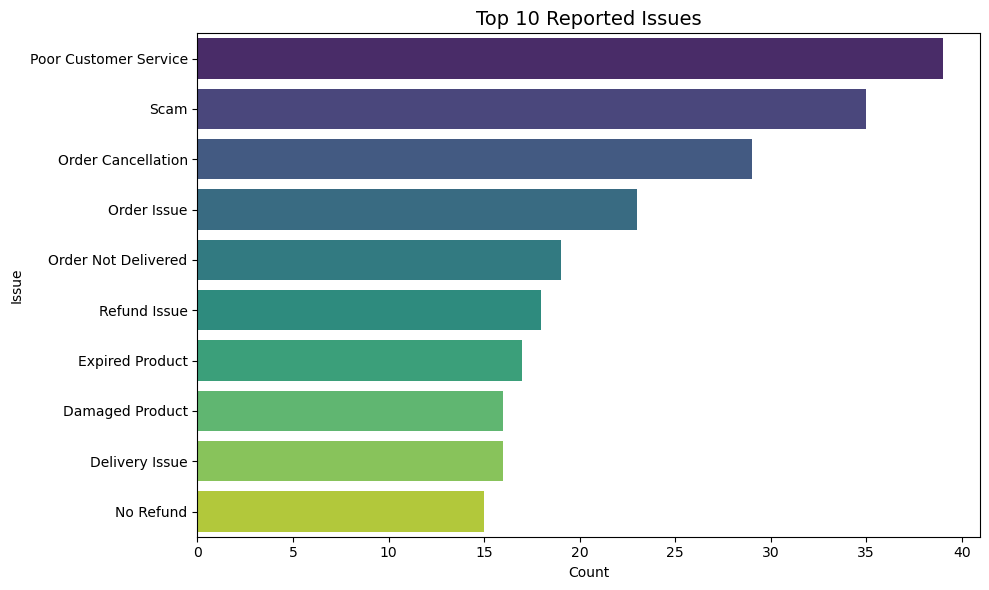

In [325]:
top_10_issues = df_issue['Issue_explod'].value_counts().head(10).reset_index()
top_10_issues.columns = ['Issue', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_issues, x='Count', y='Issue', palette='viridis')

plt.title('Top 10 Reported Issues', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Issue')
plt.tight_layout()

plt.show()

### 💡 Insight: Top 10 Reported Issues
The most common complaints center around **poor customer service**, **scam-like behavior**, and **order cancellations**.  
These indicate serious trust and service reliability issues that may be hurting customer retention.


In [326]:
len(df_resolution)

1883

In [327]:
df_resolution = df_resolution[df_resolution['Resolution_Requested_explod']!="Null"]

In [328]:
len(df_resolution)

1876

C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\3491391825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_resolution, x='Count', y='Resolution_Requested_explod', palette='viridis')


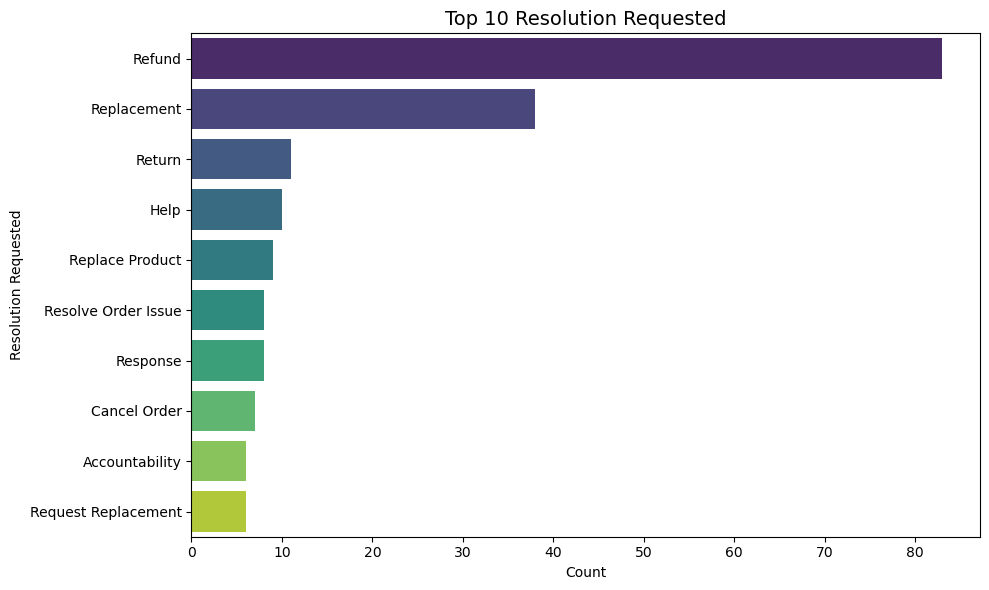

In [329]:
top_10_resolution = df_resolution['Resolution_Requested_explod'].value_counts().head(10).reset_index()
top_10_resolution.columns = ['Resolution_Requested_explod', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_resolution, x='Count', y='Resolution_Requested_explod', palette='viridis')

plt.title('Top 10 Resolution Requested', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Resolution Requested')
plt.tight_layout()

plt.show()

### 💡 Insight: Top 10 Resolutions Requested
Customers are predominantly asking for **refunds**, **replacements**, and **returns** — indicating dissatisfaction with deliveries and trust.  
A seamless post-order resolution flow could significantly improve customer satisfaction.


In [330]:
data.columns

Index(['Name', 'Query', 'User Profile', 'Date Posted', 'Post Text',
       'Post Link', 'Media', 'Comments', 'Reposts', 'Likes', 'Views',
       'Cleaned Post', 'llm_raw', 'llm_parsed', 'Issue', 'Product', 'Location',
       'Order_ID', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned',
       'primary_key'],
      dtype='object')

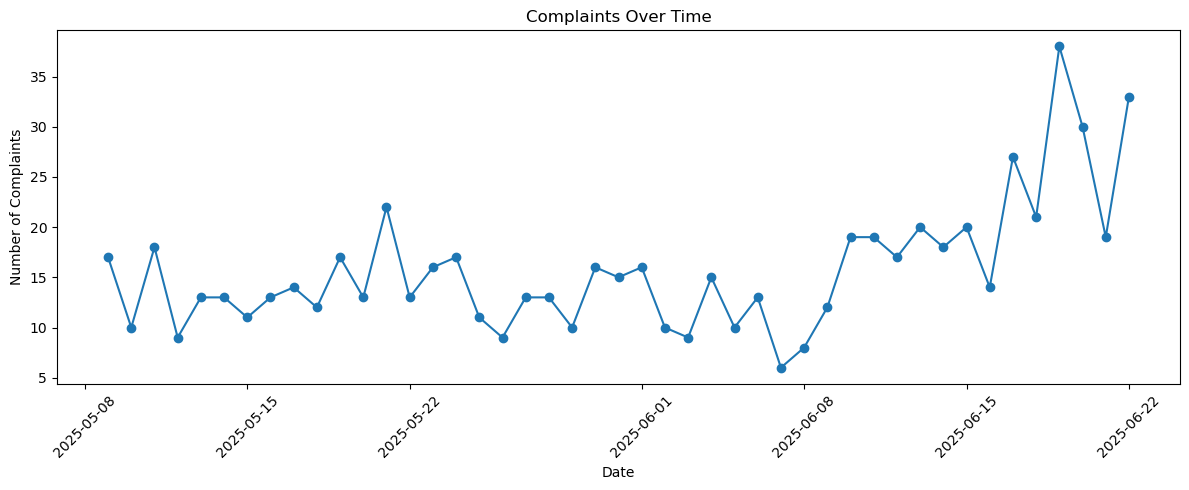

In [418]:
data['Date Posted'] = pd.to_datetime(data['Date Posted'], errors='coerce')
complaints_over_time = data.groupby(data['Date Posted'].dt.date).size()

plt.figure(figsize=(12, 5))
complaints_over_time.plot(marker='o')
plt.title('Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 💡 Insight: Complaint Volume Over Time
Complaints appear to spike at certain times, possibly due to **service outages**, **high-demand events**, or **technical issues**.  
Tracking these spikes helps anticipate future problems and deploy preventive measures.


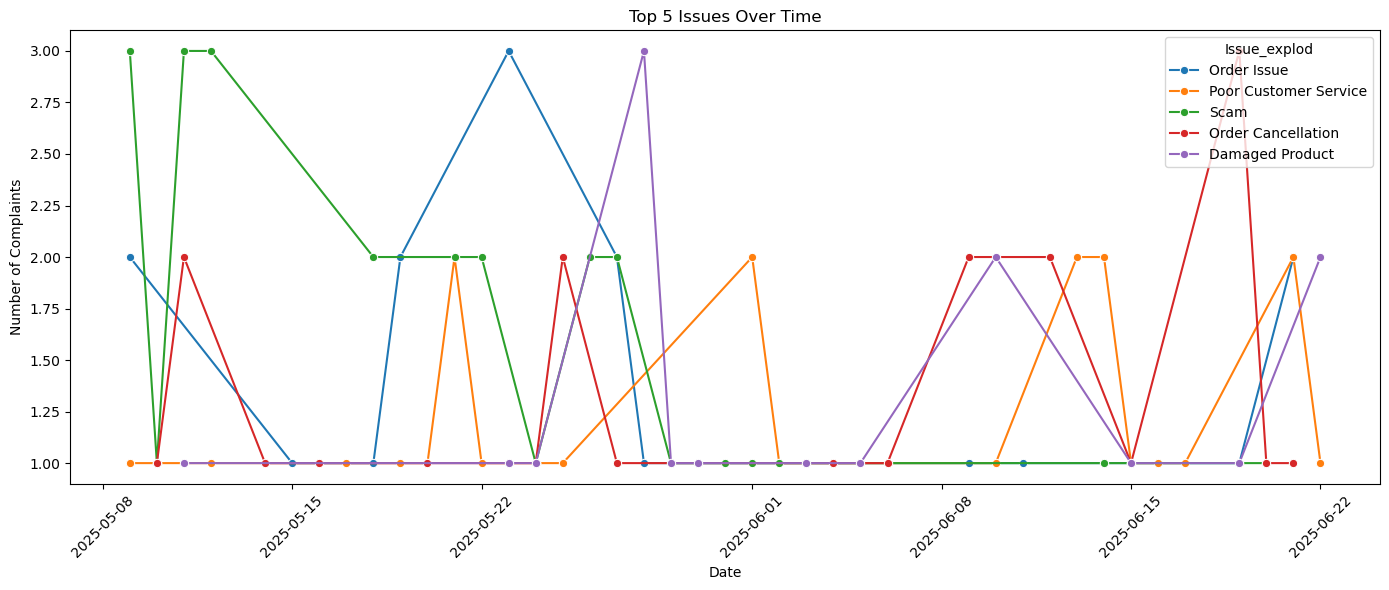

In [420]:
data['Date Posted'] = pd.to_datetime(data['Date Posted'], errors='coerce')

# Merge date with issue
issue_time = pd.merge(
    df_issue[['primary_key', 'Issue_explod']],
    data[['primary_key', 'Date Posted']],
    on='primary_key',
    how='inner'
)

# Clean date
issue_time = issue_time.dropna(subset=['Date Posted'])
issue_time['Date'] = issue_time['Date Posted'].dt.date

# Get top 5 issues
top_issues = issue_time['Issue_explod'].value_counts().head(5).index
filtered_issues = issue_time[issue_time['Issue_explod'].isin(top_issues)]

# Group by date and issue
issue_counts = (
    filtered_issues
    .groupby(['Date', 'Issue_explod'])
    .size()
    .reset_index(name='Count')
)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=issue_counts, x='Date', y='Count', hue='Issue_explod', marker='o')
plt.title('Top 5 Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 💡 Insight: Top 5 Issues Over Time
This plot shows how frequently the top complaints — such as **poor customer service** or **scams** — were reported over time.  
Spikes on specific days may reflect app outages, delivery issues, or high-pressure sales periods.


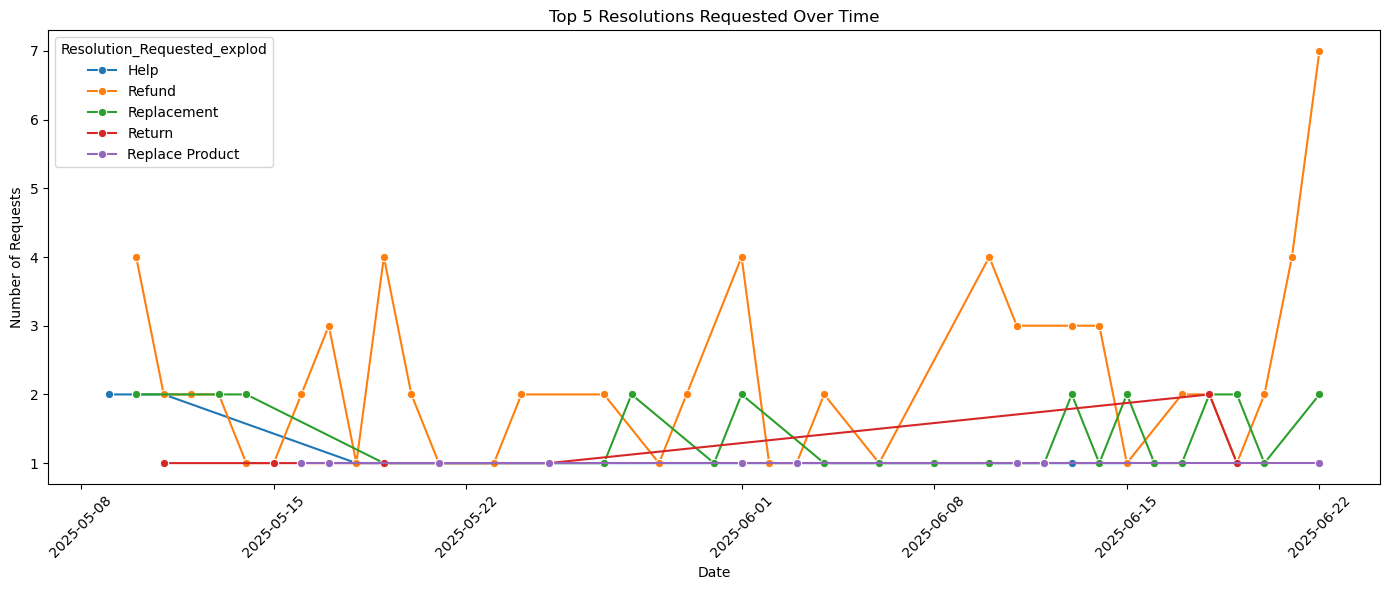

In [422]:

# Make sure 'Date Posted' is datetime
data['Date Posted'] = pd.to_datetime(data['Date Posted'], errors='coerce')

# Merge to get resolution with date
resolution_time = pd.merge(
    df_resolution[['primary_key', 'Resolution_Requested_explod']],
    data[['primary_key', 'Date Posted']],
    on='primary_key',
    how='inner'
)

# Clean date
resolution_time = resolution_time.dropna(subset=['Date Posted'])
resolution_time['Date'] = resolution_time['Date Posted'].dt.date

# Get top 5 resolutions
top_resolutions = resolution_time['Resolution_Requested_explod'].value_counts().head(5).index
filtered_resolutions = resolution_time[resolution_time['Resolution_Requested_explod'].isin(top_resolutions)]

# Group by date and resolution
resolution_counts = (
    filtered_resolutions
    .groupby(['Date', 'Resolution_Requested_explod'])
    .size()
    .reset_index(name='Count')
)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=resolution_counts, x='Date', y='Count', hue='Resolution_Requested_explod', marker='o')
plt.title('Top 5 Resolutions Requested Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 💡 Insight: Top 5 Resolutions Requested Over Time
Refunds and replacements consistently remain the top customer demands.  
Noticeable spikes in resolution requests often align with peak complaint days, highlighting support pressure points.


C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\2808927720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='Set2')


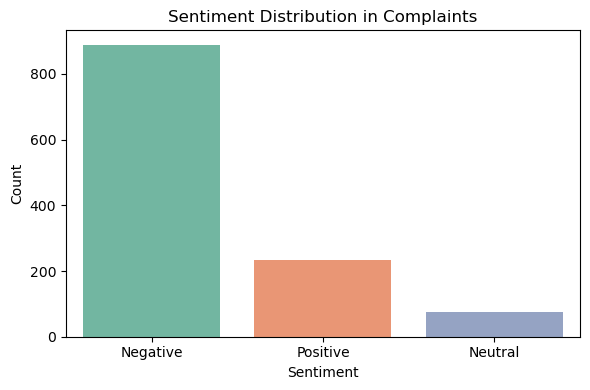

In [332]:
sentiment_counts = data['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

plt.figure(figsize=(6, 4))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='Set2')
plt.title('Sentiment Distribution in Complaints')
plt.tight_layout()
plt.show()


### 💡 Insight: Sentiment in Complaints
A majority of complaints express **negative sentiment**, showing users are largely dissatisfied.  
This reinforces the urgency to address core service and experience gaps.


C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\876497343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=urgency_counts, x='Urgency', y='Count', palette='coolwarm')


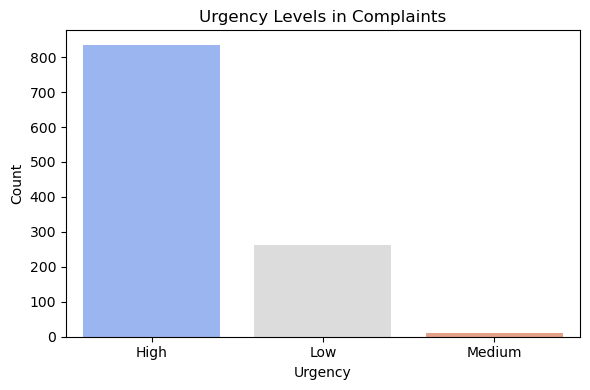

In [333]:
urgency_counts = data['Urgency'].value_counts().reset_index()
urgency_counts.columns = ['Urgency', 'Count']

plt.figure(figsize=(6, 4))
sns.barplot(data=urgency_counts, x='Urgency', y='Count', palette='coolwarm')
plt.title('Urgency Levels in Complaints')
plt.tight_layout()
plt.show()


### 💡 Insight: Urgency Levels in Complaints
Many users classify their complaints as **high urgency**, especially around refund or scam issues.  
Fast resolution and support escalation mechanisms are essential.


In [373]:
merged_issue = pd.merge(
    df_issue[['primary_key', 'Issue_explod']],
    data[['primary_key', 'Urgency', 'Sentiment']],
    on='primary_key',
    how='inner'
)


In [375]:
top_issues = merged_issue['Issue_explod'].value_counts().head(10).index
filtered = merged_issue[merged_issue['Issue_explod'].isin(top_issues)]


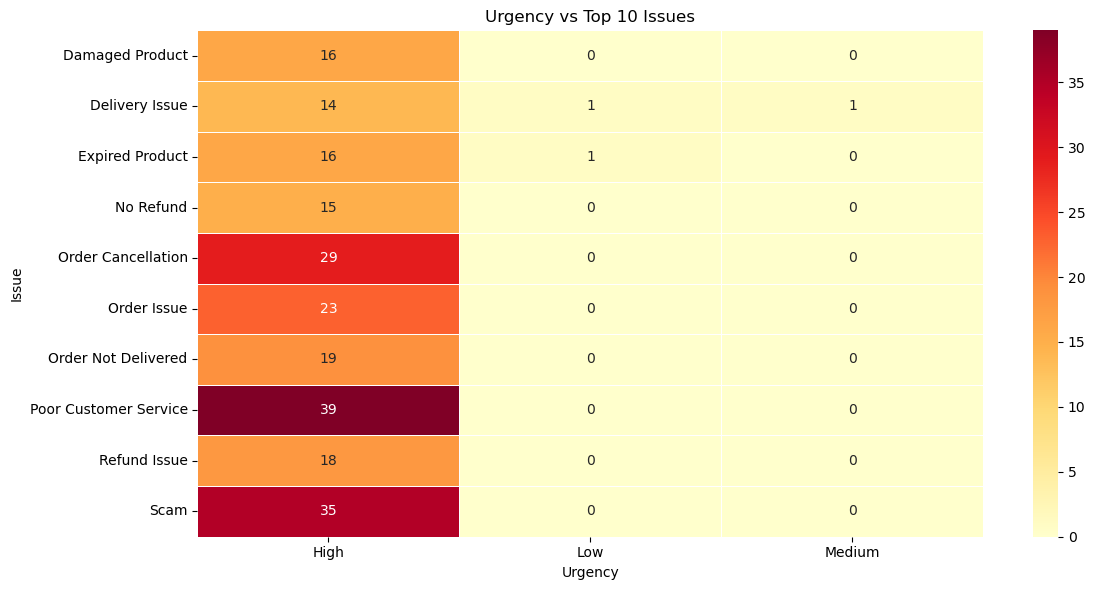

In [377]:
urgency_heat = filtered.groupby(['Issue_explod', 'Urgency']).size().reset_index(name='Count')
urgency_pivot = urgency_heat.pivot(index='Issue_explod', columns='Urgency', values='Count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(urgency_pivot, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Urgency vs Top 10 Issues')
plt.xlabel('Urgency')
plt.ylabel('Issue')
plt.tight_layout()
plt.show()


### 💡 Insight: Urgency vs Issue
Complaints about **scams**, **poor customer support**, and **cancellations** are often marked as **high urgency**.  
These should be prioritized in the service escalation process.


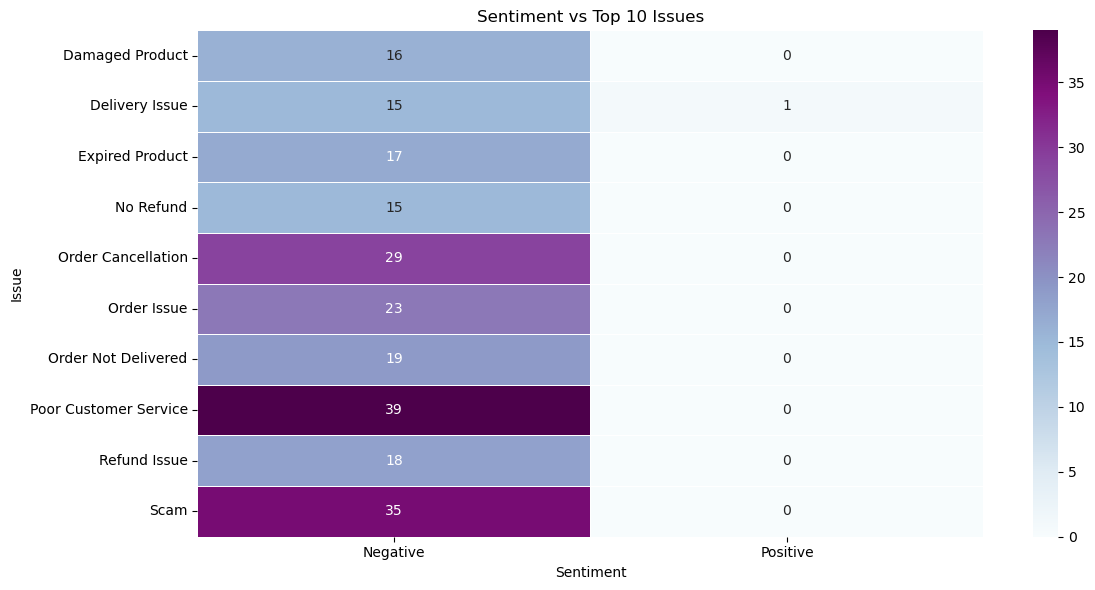

In [379]:
sentiment_heat = filtered.groupby(['Issue_explod', 'Sentiment']).size().reset_index(name='Count')
sentiment_pivot = sentiment_heat.pivot(index='Issue_explod', columns='Sentiment', values='Count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_pivot, annot=True, fmt='.0f', cmap='BuPu', linewidths=0.5)
plt.title('Sentiment vs Top 10 Issues')
plt.xlabel('Sentiment')
plt.ylabel('Issue')
plt.tight_layout()
plt.show()


### 💡 Insight: Sentiment vs Issue
Issues such as **scams** and **poor service** have the strongest **negative sentiment**, reflecting customer frustration and trust loss.  
These are not just operational issues — they are reputational risks.


In [381]:
merged_resolution = pd.merge(
    df_resolution[['primary_key', 'Resolution_Requested_explod']],
    data[['primary_key', 'Urgency', 'Sentiment']],
    on='primary_key',
    how='inner'
)


In [383]:
top_resolutions = merged_resolution['Resolution_Requested_explod'].value_counts().head(10).index
filtered = merged_resolution[merged_resolution['Resolution_Requested_explod'].isin(top_resolutions)]


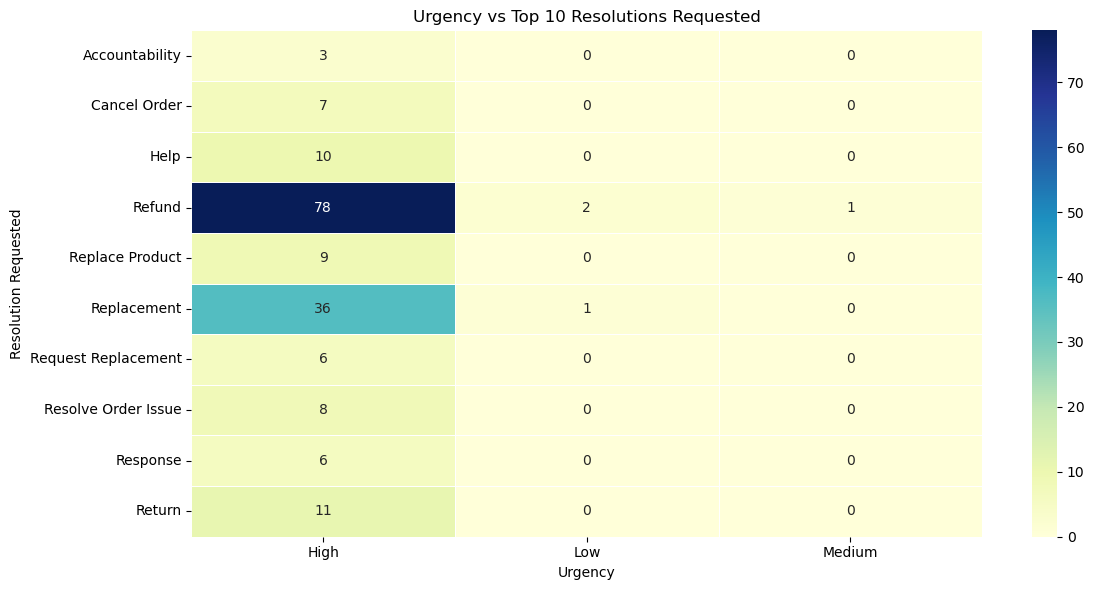

In [410]:
urgency_heat = filtered.groupby(['Resolution_Requested_explod', 'Urgency']).size().reset_index(name='Count')
urgency_pivot = urgency_heat.pivot(index='Resolution_Requested_explod', columns='Urgency', values='Count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(urgency_pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Urgency vs Top 10 Resolutions Requested')
plt.xlabel('Urgency')
plt.ylabel('Resolution Requested')
plt.tight_layout()
plt.show()


### 💡 Insight: Urgency vs Resolution
Users asking for **refunds** and **replacements** often tag their issues as **high urgency**.  
These resolution types need the quickest attention in support systems.


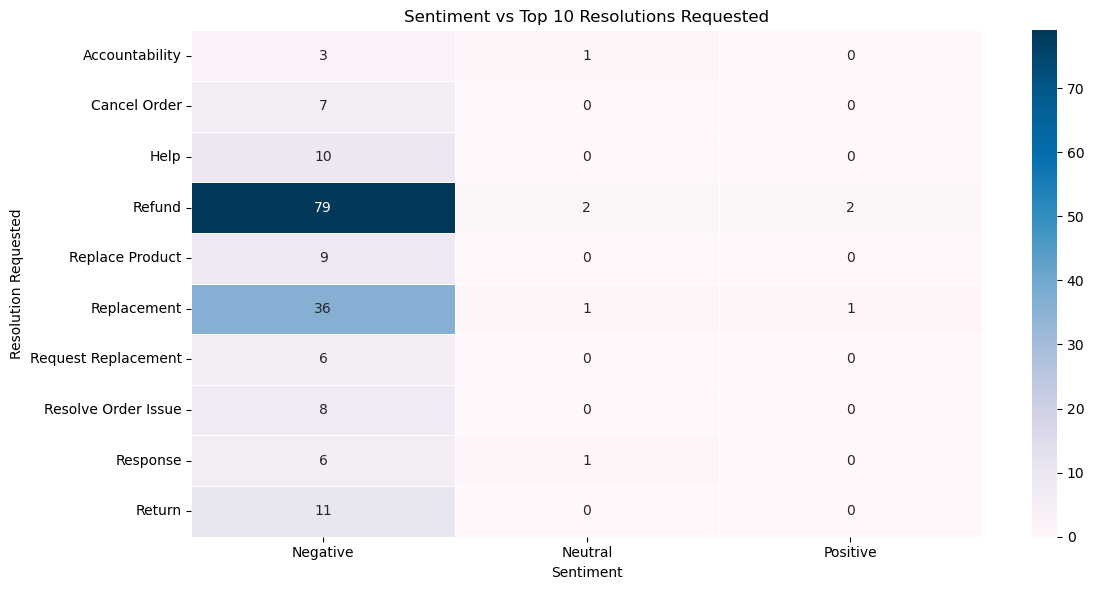

In [387]:
sentiment_heat = filtered.groupby(['Resolution_Requested_explod', 'Sentiment']).size().reset_index(name='Count')
sentiment_pivot = sentiment_heat.pivot(index='Resolution_Requested_explod', columns='Sentiment', values='Count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_pivot, annot=True, fmt='.0f', cmap='PuBu', linewidths=0.5)
plt.title('Sentiment vs Top 10 Resolutions Requested')
plt.xlabel('Sentiment')
plt.ylabel('Resolution Requested')
plt.tight_layout()
plt.show()


### 💡 Insight: Sentiment vs Resolution
Resolutions like **refunds** and **returns** are associated with highly **negative sentiment**.  
Delays or failures in these processes worsen customer perception and must be handled sensitively.


In [391]:
data.columns

Index(['Name', 'Query', 'User Profile', 'Date Posted', 'Post Text',
       'Post Link', 'Media', 'Comments', 'Reposts', 'Likes', 'Views',
       'Cleaned Post', 'llm_raw', 'llm_parsed', 'Issue', 'Product', 'Location',
       'Order_ID', 'Sentiment', 'Urgency', 'Resolution_Requested',
       'Issue_cleaned', 'Product_cleaned', 'Resolution_Requested_cleaned',
       'primary_key'],
      dtype='object')

In [395]:
df_issue.columns

Index(['primary_key', 'Issue_cleaned', 'Issue_explod'], dtype='object')

In [397]:
df_resolution.columns

Index(['primary_key', 'Resolution_Requested_cleaned',
       'Resolution_Requested_explod'],
      dtype='object')

C:\Users\Pranav\AppData\Local\Temp\ipykernel_3212\1821700645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=engagement_df, x='Sentiment', y='Likes', palette='pastel')


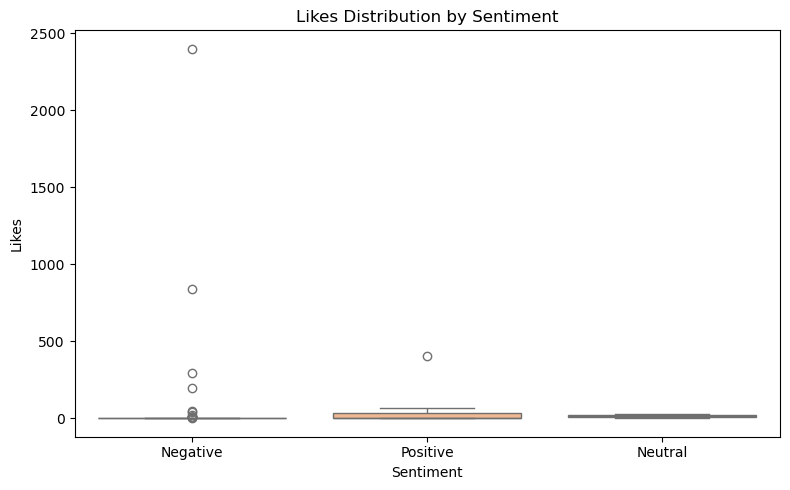

In [399]:
engagement_df = data[['Sentiment', 'Likes', 'Views', 'Reposts']].dropna()
engagement_df[['Likes', 'Views', 'Reposts']] = engagement_df[['Likes', 'Views', 'Reposts']].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(8, 5))
sns.boxplot(data=engagement_df, x='Sentiment', y='Likes', palette='pastel')
plt.title('Likes Distribution by Sentiment')
plt.tight_layout()
plt.show()


### 💡 Insight: Likes vs Sentiment
Negative posts tend to receive more likes, suggesting that frustrated customers find greater public support.  
This amplifies bad experiences and highlights the importance of prompt issue handling.


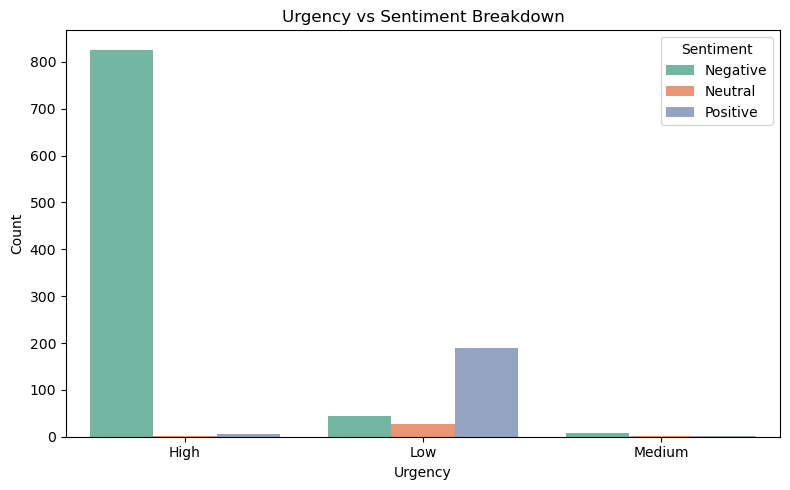

In [401]:
urgency_sentiment = data.groupby(['Urgency', 'Sentiment']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=urgency_sentiment, x='Urgency', y='Count', hue='Sentiment', palette='Set2')
plt.title('Urgency vs Sentiment Breakdown')
plt.tight_layout()
plt.show()


### 💡 Insight: Urgency vs Sentiment
Complaints labeled as **high urgency** are mostly **negative**, while low urgency ones are more neutral or mixed.  
This shows how emotional intensity correlates with service failure severity.
